In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mirae = pd.read_csv('/content/drive/MyDrive/미래에셋/mirae_stockname.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,22,33,34,35,39,40,41,45,46,47,61,62,80,91,92,93,97,98,99,103,104,105,119,120,138,149,150,151,155,156,157,161,162,163,177,178,196,207,208,209,213,214,215,219,220,221,235,236,254,265,266,267,271,272,273,277,278,279,293,294,312,323,324,325,329,330,331,335,336,337,351,352,370,381,382,383,387,388,389,393,394,395,409,410,428,439,440,441,445,446,447,451,452,453,467,468,486,497,498,499,503,504,505,509,510,511,525,526,544,555,556,557,561,562,563,567,568,569,583,584,602,613,614,615,619,620,621,625,626,627,641,642,660,671,672,673,677,678,679,683,684,685) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
mirae.tail()

,성별,연령,최초계좌개설일,고객등급_202105,주거래상품_202105,주거래매체_202105,국내주식자산_202105,해외주식자산_202105,상품자산_202105,보유종목수_202105,국내주식매수_202105,국내주식매도_202105,해외주식매수_202105,해외주식매도_202105,거래종목수_202105,m.Stock_접속일수_202105,m.Global_접속일수_202105,m.All_접속일수_202105,퇴직연금자산_202105,개인연금자산_202105,코스피거래비중_202105,코스닥거래비중_202105,선호시장_202105,손절횟수_202105,이익실현횟수_202105,DayTrading비중_202105,Swing비중_202105,Buy&Hold비중_202105,시총1천억미만선호도_202105,시총1천억이상3천억미만선호도_202105,시총3천억이상1조미만선호도_202105,시총1조이상선호도_202105,신용_202105,주식보유1위종목_202105,주식보유2위종목_202105,주식보유3위종목_202105,주식보유1위금액_202105,주식보유2위금액_202105,주식보유3위금액_202105,주식매수1위종목_202105,...,코스닥거래비중_202006,선호시장_202006,손절횟수_202006,이익실현횟수_202006,DayTrading비중_202006,Swing비중_202006,Buy&Hold비중_202006,시총1천억미만선호도_202006,시총1천억이상3천억미만선호도_202006,시총3천억이상1조미만선호도_202006,시총1조이상선호도_202006,신용_202006,주식보유1위종목_202006,주식보유2위종목_202006,주식보유3위종목_202006,주식보유1위금액_202006,주식보유2위금액_202006,주식보유3위금액_202006,주식매수1위종목_202006,주식매수2위종목_202006,주식매수3위종목_202006,주식매수1위금액_202006,주식매수2위금액_202006,주식매수3위금액_202006,주식매도1위종목_202006,주식매도2위종목_202006,주식매도3위종목_202006,주식매도1위금액_202006,주식매도2위금액_202006,주식매도3위금액_202006,Dr.Big의국내주식_202006,Dr.Big의해외주식_202006,Dr.Big의국내ETF_202006,Dr.Big의펀드연금_202006,Dr.Big의투자진단_202006,Dr.Big의시그널_202006,뉴스로종목포착_202006,해외ETF트렌드_202006,초고수의선택_202006,주간상품TOP10_202006
1499987,1.0,30대,201606.0,S,주식,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,8.0,92.0,코스닥,7.0,3.0,7.0,82.0,8.0,0.0,57.0,24.0,19.0,0.0,A082800,A048870,0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499988,1.0,40대,200705.0,H,주식,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,0.0,72.0,28.0,코스피,16.0,21.0,10.0,85.0,3.0,19.0,68.0,11.0,2.0,0.0,A025550,A019770,A004540,0.0,0.0,0.0,A025550,...,28.0,코스피,9.0,12.0,18.0,78.0,4.0,55.0,39.0,6.0,0.0,0.0,A014990,A014990,A014990,0.0,0.0,0.0,A014990,0,0,0.0,0.0,0.0,A033340,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499989,1.0,50대,200001.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499990,1.0,60대이상,201311.0,R,퇴직연금,1,400000.0,0.0,0.0,2.0,190000.0,170000.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,70.0,30.0,코스피,0.0,6.0,0.0,91.0,8.0,0.0,1.0,24.0,75.0,0.0,A006400,A005930,A302440,230000.0,150000.0,11000.0,0,...,46.0,코스피,0.0,3.0,0.0,99.0,0.0,0.0,0.0,45.0,55.0,0.0,A078160,A006360,0,0.0,0.0,0.0,A078160,A078600,A006360,0.0,0.0,0.0,A078600,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499991,1.0,60대이상,200001.0,H,주식,1,9900000.0,0.0,30000.0,0.0,5800000.0,6900000.0,0.0,0.0,0.0,20.0,0.0,19.0,13000000.0,0.0,100.0,0.0,코스피,0.0,4.0,0.0,85.0,14.0,0.0,0.0,0.0,100.0,0.0,A036460,0,0,7400000.0,2000000.0,740000.0,0,...,0.0,코스피,0.0,2.0,0.0,82.0,17.0,0.0,0.0,0.0,100.0,0.0,A036460,A015760,0,2500000.0,640000.0,200000.0,A015760,0,0,540000.0,160000.0,140000.0,0,0,0,770000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
month_count = ['202105','202104','202103','202102','202101','202012','202011','202010','202009','202008','202007','202006']
#기존 데이터의 시총 금액별 선호도 칼럼을 이용, Kmeans clustering을 진행
mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']] = pd.DataFrame(data = np.array([[0,0,0,0]]*1499992), columns=['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도'])

#달마다 시총 금액별 선호도를 모두 더함
for i in month_count:
  mirae['시총1천억미만선호도'] = mirae['시총1천억미만선호도'] + mirae['시총1천억미만선호도_'+i]
  mirae['시총1천억이상3천억미만선호도'] = mirae['시총1천억이상3천억미만선호도'] + mirae['시총1천억이상3천억미만선호도_'+i]
  mirae['시총3천억이상1조미만선호도'] = mirae['시총3천억이상1조미만선호도'] + mirae['시총3천억이상1조미만선호도_'+i]
  mirae['시총1조이상선호도'] = mirae['시총1조이상선호도'] + mirae['시총1조이상선호도_'+i]

#시총 금액별 총 선호도를 퍼센트 형식으로 나타냄
mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']] = np.around(mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']] / 12)
mirae['numb'] = 100/(mirae['시총1천억미만선호도']+mirae['시총1천억이상3천억미만선호도']+mirae['시총3천억이상1조미만선호도']+mirae['시총1조이상선호도'])
mirae['시총1천억미만선호도'] = np.around(mirae['numb']*mirae['시총1천억미만선호도'])
mirae['시총1천억이상3천억미만선호도'] = np.around(mirae['numb']*mirae['시총1천억이상3천억미만선호도'])
mirae['시총3천억이상1조미만선호도'] = np.around(mirae['numb']*mirae['시총3천억이상1조미만선호도'])
mirae['시총1조이상선호도'] = np.around(mirae['numb']*mirae['시총1조이상선호도'])

del mirae['numb']

In [ ]:
mirae.tail()

,성별,연령,최초계좌개설일,고객등급_202105,주거래상품_202105,주거래매체_202105,국내주식자산_202105,해외주식자산_202105,상품자산_202105,보유종목수_202105,국내주식매수_202105,국내주식매도_202105,해외주식매수_202105,해외주식매도_202105,거래종목수_202105,m.Stock_접속일수_202105,m.Global_접속일수_202105,m.All_접속일수_202105,퇴직연금자산_202105,개인연금자산_202105,코스피거래비중_202105,코스닥거래비중_202105,선호시장_202105,손절횟수_202105,이익실현횟수_202105,DayTrading비중_202105,Swing비중_202105,Buy&Hold비중_202105,시총1천억미만선호도_202105,시총1천억이상3천억미만선호도_202105,시총3천억이상1조미만선호도_202105,시총1조이상선호도_202105,신용_202105,주식보유1위종목_202105,주식보유2위종목_202105,주식보유3위종목_202105,주식보유1위금액_202105,주식보유2위금액_202105,주식보유3위금액_202105,주식매수1위종목_202105,...,Swing비중_202006,Buy&Hold비중_202006,시총1천억미만선호도_202006,시총1천억이상3천억미만선호도_202006,시총3천억이상1조미만선호도_202006,시총1조이상선호도_202006,신용_202006,주식보유1위종목_202006,주식보유2위종목_202006,주식보유3위종목_202006,주식보유1위금액_202006,주식보유2위금액_202006,주식보유3위금액_202006,주식매수1위종목_202006,주식매수2위종목_202006,주식매수3위종목_202006,주식매수1위금액_202006,주식매수2위금액_202006,주식매수3위금액_202006,주식매도1위종목_202006,주식매도2위종목_202006,주식매도3위종목_202006,주식매도1위금액_202006,주식매도2위금액_202006,주식매도3위금액_202006,Dr.Big의국내주식_202006,Dr.Big의해외주식_202006,Dr.Big의국내ETF_202006,Dr.Big의펀드연금_202006,Dr.Big의투자진단_202006,Dr.Big의시그널_202006,뉴스로종목포착_202006,해외ETF트렌드_202006,초고수의선택_202006,주간상품TOP10_202006,시총1천억미만선호도,시총1천억이상3천억미만선호도,시총3천억이상1조미만선호도,시총1조이상선호도,numb
1499987,1.0,30대,201606.0,S,주식,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,8.0,92.0,코스닥,7.0,3.0,7.0,82.0,8.0,0.0,57.0,24.0,19.0,0.0,A082800,A048870,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,42.0,25.0,11.0,1.204819
1499988,1.0,40대,200705.0,H,주식,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,0.0,72.0,28.0,코스피,16.0,21.0,10.0,85.0,3.0,19.0,68.0,11.0,2.0,0.0,A025550,A019770,A004540,0.0,0.0,0.0,A025550,...,78.0,4.0,55.0,39.0,6.0,0.0,0.0,A014990,A014990,A014990,0.0,0.0,0.0,A014990,0,0,0.0,0.0,0.0,A033340,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,53.0,11.0,3.0,0.990099
1499989,1.0,50대,200001.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,inf
1499990,1.0,60대이상,201311.0,R,퇴직연금,1,400000.0,0.0,0.0,2.0,190000.0,170000.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,70.0,30.0,코스피,0.0,6.0,0.0,91.0,8.0,0.0,1.0,24.0,75.0,0.0,A006400,A005930,A302440,230000.0,150000.0,11000.0,0,...,99.0,0.0,0.0,0.0,45.0,55.0,0.0,A078160,A006360,0,0.0,0.0,0.0,A078160,A078600,A006360,0.0,0.0,0.0,A078600,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,42.0,1.000000
1499991,1.0,60대이상,200001.0,H,주식,1,9900000.0,0.0,30000.0,0.0,5800000.0,6900000.0,0.0,0.0,0.0,20.0,0.0,19.0,13000000.0,0.0,100.0,0.0,코스피,0.0,4.0,0.0,85.0,14.0,0.0,0.0,0.0,100.0,0.0,A036460,0,0,7400000.0,2000000.0,740000.0,0,...,82.0,17.0,0.0,0.0,0.0,100.0,0.0,A036460,A015760,0,2500000.0,640000.0,200000.0,A015760,0,0,540000.0,160000.0,140000.0,0,0,0,770000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.086957


In [ ]:
mirae.shape

(1499992, 704)

In [ ]:
from sklearn.cluster import KMeans

#쉬운 클러스터링을 위해 따로 데이터프레임을 만듬
df_sichong = mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']]

# kmeans = KMeans(n_clusters=3)

# y = kmeans.fit_predict(df)

# df['Cluster'] = y
# df[['daytrading','swing','buy&hold']] = mirae[['daytrading','swing','buy&hold']]/100

# print(df.head())

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_

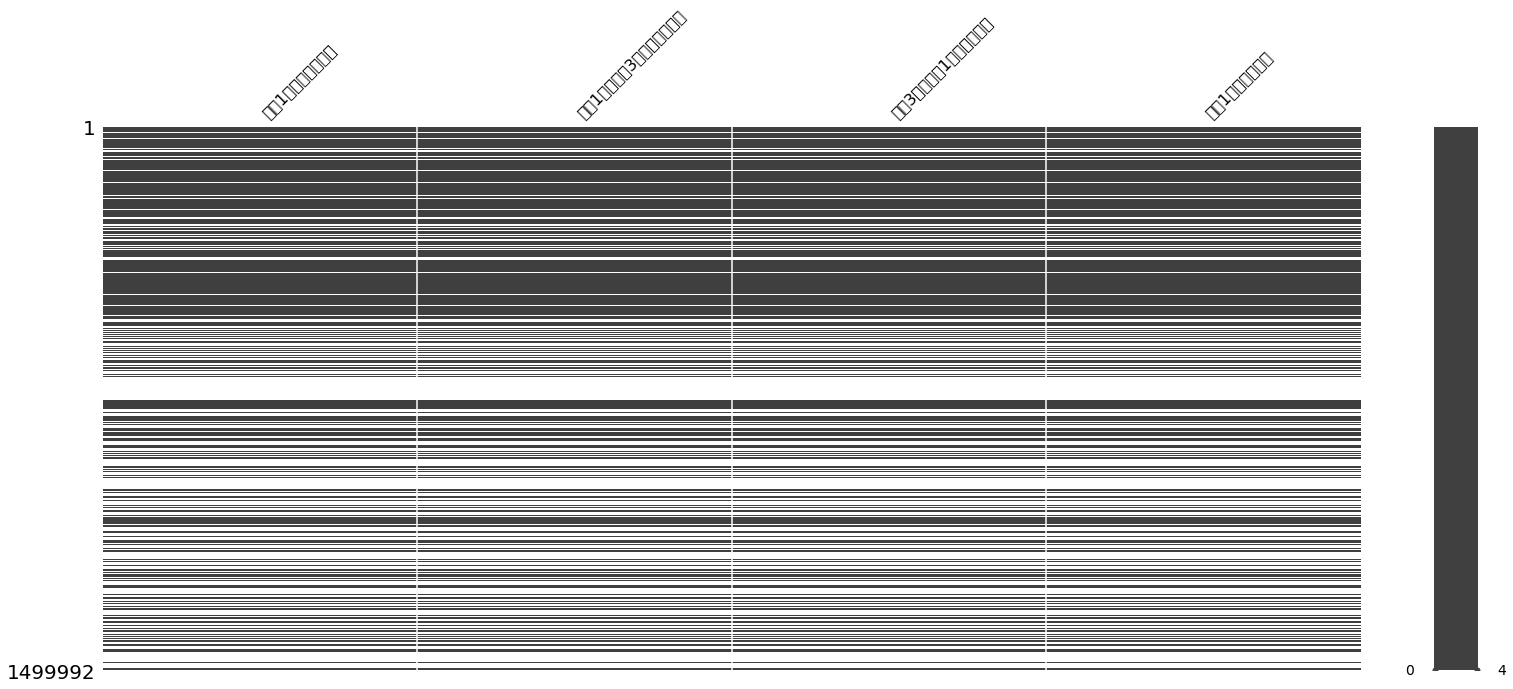

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.isna().value_counts()

시총1천억미만선호도  시총1천억이상3천억미만선호도  시총3천억이상1조미만선호도  시총1조이상선호도
False       False            False           False        803784
True        True             True            True         696208
dtype: int64

In [ ]:
#결측치가 들어가 있는 데이터는 버려줌
df_sichong = df_sichong[df_sichong['시총1천억미만선호도'].isna() == False]

In [ ]:
df.isna().value_counts()

시총1천억미만선호도  시총1천억이상3천억미만선호도  시총3천억이상1조미만선호도  시총1조이상선호도
False       False            False           False        803784
dtype: int64

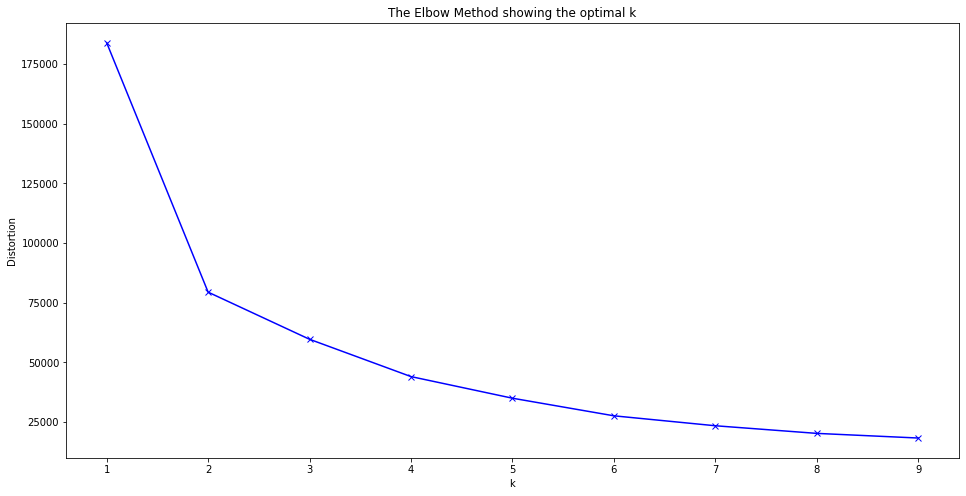

In [ ]:
#optimal cluster의 갯수를 구하기 위해 elbow method 이용
distortions = []
for k in range(1,10):
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(df_sichong)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#그래프 결과, 4에서 elbow가 생기는걸 볼 수 있음

# 4로 Clustering 한 경우

In [ ]:
kmeans = KMeans(n_clusters=4)

#위의 결과를 바탕으로 4개의 cluster로 구분함
y = kmeans.fit_predict(df_sichong)

df_sichong['sichong_cluster'] = y
df_sichong[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']] = mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']]/100

print(df_sichong.head())

   시총1천억미만선호도  시총1천억이상3천억미만선호도  시총3천억이상1조미만선호도  시총1조이상선호도  Cluster
2        0.00             0.07            0.17       0.76        0
3        0.00             0.07            0.19       0.74        0
4        0.00             0.00            0.14       0.86        0
5        0.10             0.12            0.11       0.68        0
8        0.16             0.42            0.29       0.13        1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_sichong['sichong_cluster'].value_counts()

0    455295
2    174278
3    122678
1     51533
Name: Cluster, dtype: int64

In [ ]:
df_sichong[df_sichong['sichong_cluster'] == 0].iloc[:30]
#cluster 0은 3천억 이상부터 1조 이상까지 골고루

,시총1천억미만선호도,시총1천억이상3천억미만선호도,시총3천억이상1조미만선호도,시총1조이상선호도,Cluster
2,0.00,0.07,0.17,0.76,0
3,0.00,0.07,0.19,0.74,0
4,0.00,0.00,0.14,0.86,0
5,0.10,0.12,0.11,0.68,0
12,0.00,0.00,0.00,1.00,0
13,0.00,0.00,0.00,1.00,0
15,0.00,0.00,0.00,1.00,0
17,0.00,0.25,0.09,0.65,0
19,0.02,0.00,0.00,0.98,0
20,0.00,0.18,0.24,0.59,0


In [ ]:
df_sichong[df_sichong['sichong_cluster'] == 2].iloc[:30]
#cluster 2는 1천억~1조 골고루 선호

,시총1천억미만선호도,시총1천억이상3천억미만선호도,시총3천억이상1조미만선호도,시총1조이상선호도,Cluster
9,0.17,0.29,0.33,0.21,2
10,0.12,0.43,0.00,0.45,2
11,0.00,0.10,0.44,0.46,2
22,0.14,0.19,0.23,0.43,2
23,0.15,0.27,0.36,0.21,2
25,0.00,0.00,0.48,0.52,2
26,0.04,0.27,0.33,0.35,2
34,0.10,0.20,0.50,0.20,2
38,0.07,0.28,0.27,0.37,2
40,0.04,0.30,0.35,0.31,2


In [ ]:
df_sichong[df_sichong['sichong_cluster'] == 3].iloc[:30]
#cluster 3은 1조 미만 골고루 선호

,시총1천억미만선호도,시총1천억이상3천억미만선호도,시총3천억이상1조미만선호도,시총1조이상선호도,Cluster
8,0.16,0.42,0.29,0.13,3
18,0.17,0.67,0.17,0.00,3
31,0.45,0.30,0.23,0.02,3
39,0.16,0.47,0.29,0.08,3
50,0.09,0.47,0.29,0.15,3
54,1.00,0.00,0.00,0.00,3
57,0.00,1.00,0.00,0.00,3
68,0.15,0.53,0.16,0.16,3
71,0.26,0.38,0.18,0.18,3
78,0.73,0.18,0.02,0.07,3


In [ ]:
df_sichong[df_sichong['sichong_cluster'] == 1].iloc[:30]
#cluster 1은 3천억 이상부터 1조 이상까지 골고루

,시총1천억미만선호도,시총1천억이상3천억미만선호도,시총3천억이상1조미만선호도,시총1조이상선호도,Cluster
24,0.07,0.22,0.56,0.15,1
30,0.07,0.30,0.57,0.06,1
72,0.21,0.22,0.58,0.00,1
87,0.00,0.20,0.79,0.01,1
140,0.00,0.02,0.78,0.20,1
181,0.00,0.12,0.61,0.27,1
219,0.00,0.01,0.63,0.36,1
221,0.00,0.00,1.00,0.00,1
318,0.12,0.25,0.62,0.00,1
341,0.00,0.20,0.68,0.12,1
